In [1]:
import pandas as pd
import numpy as np
import time
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.spatial.distance import pdist,squareform, cosine

import itertools

In [2]:
x = joblib.load('essay_laser_whole_asap7')
x_i = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap7')
traits = joblib.load('df_essay7_traits_sum')
x_normed = (x_i-x_i.min(axis=0))/(x_i.max(axis=0)-x_i.min(axis=0))
feats = joblib.load('feat_names12')

In [3]:
score_gb = joblib.load('score_model_gb_normalized_float_laser_whole')
score_rf = joblib.load('score_model_rf_normalized_float_laser_whole')
score_rr = joblib.load('score_model_rr_normalized_float_laser_whole')

## Cosine

In [4]:
dist1d = pdist(x, metric='cosine')
dist1d

array([0.21477169, 0.22212897, 0.17800776, ..., 0.18398383, 0.17703791,
       0.14622815])

In [5]:
iterator = list(itertools.combinations(range(1569),2))
iterator[:5]

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]

In [6]:
iterator.index((0,6))

5

In [7]:
dist1d[5]

0.1774788725869627

In [8]:
cosine(x[0],x[6])

0.17747890949249268

In [9]:
#euclidean distance
np.linalg.norm(x[0]-x[6])

0.5192765

In [10]:
# Normalize
# dist1d = dist1d / np.max(dist1d)
# dist1d

In [11]:
# MinMax Normalization
dist1d = (dist1d-min(dist1d))/(max(dist1d)-min(dist1d))
dist1d

array([0.18638351, 0.19516418, 0.14250688, ..., 0.14963914, 0.14134939,
       0.10457889])

In [12]:
iterdist = list(zip(iterator, dist1d))

In [13]:
iterdist

[((0, 1), 0.18638350579071297),
 ((0, 2), 0.1951641845427852),
 ((0, 3), 0.14250688034920714),
 ((0, 4), 0.1600442751592173),
 ((0, 5), 0.22059975789930789),
 ((0, 6), 0.14187566993116119),
 ((0, 7), 0.1616591365619451),
 ((0, 8), 0.15789766504630415),
 ((0, 9), 0.11101198450485492),
 ((0, 10), 0.1380381318109086),
 ((0, 11), 0.1725270596696871),
 ((0, 12), 0.12751985211056385),
 ((0, 13), 0.1687463859874646),
 ((0, 14), 0.1541495819060062),
 ((0, 15), 0.15774687357886327),
 ((0, 16), 0.17382597095576272),
 ((0, 17), 0.20731802525512666),
 ((0, 18), 0.2020755751040132),
 ((0, 19), 0.1506870095410442),
 ((0, 20), 0.15581330145236216),
 ((0, 21), 0.13640458966855384),
 ((0, 22), 0.15667141004048268),
 ((0, 23), 0.11304345437401428),
 ((0, 24), 0.15877213237689058),
 ((0, 25), 0.12991185201540845),
 ((0, 26), 0.17441844847906204),
 ((0, 27), 0.15956823377146856),
 ((0, 28), 0.17122468455071763),
 ((0, 29), 0.15745467271895114),
 ((0, 30), 0.15547622017317358),
 ((0, 31), 0.098312488712156

In [14]:
iterdist_sorted = sorted(iterdist, key=lambda x: x[1])

iterdist_sorted

[((471, 585), 0.0),
 ((643, 1476), 0.002853451449647248),
 ((198, 276), 0.004810394471530587),
 ((781, 1476), 0.005328553750573719),
 ((273, 1476), 0.006444153516889121),
 ((218, 1224), 0.00825033002252223),
 ((559, 1004), 0.008256247903500347),
 ((856, 1438), 0.008390124742990196),
 ((886, 1532), 0.009019386464588183),
 ((355, 856), 0.009489868212310787),
 ((1224, 1476), 0.009846157545708008),
 ((198, 1004), 0.01024092805979453),
 ((915, 1224), 0.010269921661435505),
 ((730, 1438), 0.010292655572802102),
 ((238, 669), 0.010373083954202798),
 ((727, 1532), 0.010527738287059562),
 ((1476, 1532), 0.010865547483289524),
 ((730, 1476), 0.011626579873509697),
 ((1511, 1555), 0.011850901916479056),
 ((643, 730), 0.011980539021091375),
 ((407, 677), 0.012328857374323217),
 ((376, 1532), 0.012405543586913988),
 ((886, 1336), 0.012677930208619563),
 ((677, 1555), 0.01316051912243562),
 ((447, 677), 0.013263617439829446),
 ((386, 1532), 0.013341884253580974),
 ((975, 1374), 0.013404587319988392)

In [15]:
joblib.dump(iterdist_sorted, 'iterdist_sorted_laser')

['iterdist_sorted_laser']

In [15]:
iterdist_sorted[-10:]

[((612, 1015), 0.9271087808498947),
 ((363, 816), 0.9312599990219519),
 ((816, 1015), 0.9315180180092758),
 ((363, 890), 0.9482437108755521),
 ((890, 1015), 0.9486648544943602),
 ((460, 890), 0.9513303848939191),
 ((460, 612), 0.9594721086372636),
 ((890, 1064), 0.9653815126405619),
 ((816, 1064), 0.9807790729499043),
 ((612, 1064), 1.0)]

In [16]:
print("Score: ", traits.loc[612]['domain1_score'])
print(traits.loc[612]['essay'])
print("---------------------------")
print("Score: ", traits.loc[1064]['domain1_score'])
print(traits.loc[1064]['essay'])

Score:  16
When I have patient is when I go out to eat. So no one can speat in, my food. Like one time I went out to eat with my family. And we all was dress alike for my birthday. So I ask my daddyto tell them that my birthday is to day. And I wanted a piece of cake now. So he want to tell what I said and they ??? give us a minute. So I waited and waited. And finly said bring me a piece of cake now or I will have this place brun down. Then my dad said bring her a piece cause she can have that happen. So they finly bring my cake. And they sang happy birthday to me. And I was happy after that in tell I found out they speat in my food and ate itto. I had found out because before I lifte I heard some people talking about how they speat in my food. Then I said wait did you in the fries they said yea. Then I said o I don`t care cause I didnt eat the fries. They said why I because I the fries is neasty. And I rolled my eyes and walked away. But I don`t  do that because I scared somebody woul

## Nearest & Farthest Pair of Essays

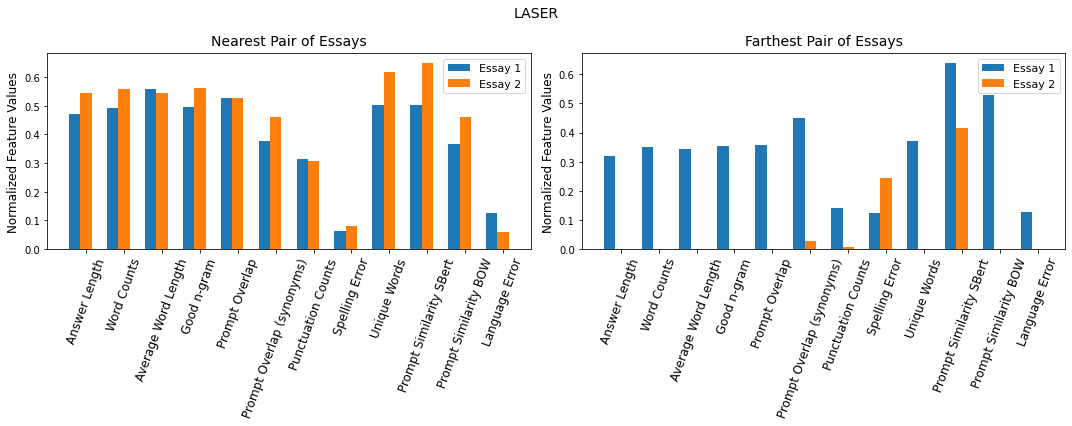

In [18]:
a = x_normed[471][:12]
b = x_normed[585][:12]

c = x_normed[612][:12]
d = x_normed[1064][:12]

ind = np.arange(12)
width = 0.3

plt.figure(figsize=(15,6))
plt.title("Feature Differences")
plt.suptitle("LASER", fontsize=14)

ax1 = plt.subplot(1, 2, 1)
ax1.set_title("Nearest Pair of Essays", fontsize=14, y=1.01)
ax1.bar(ind, a, width, align='center', label='Essay 1')
ax1.bar(ind + width, b, width, align='center', label='Essay 2')
ax1.set_ylabel("Normalized Feature Values", fontsize=12)
ax1.set_xticks(ind + width)
ax1.set_xticklabels(feats, fontdict=None, minor=False, fontsize=12, rotation=70)
ax1.legend(fontsize=11, loc='upper right')#, framealpha=0.5)#fancybox=True, shadow=True, borderpad=0.5)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title("Farthest Pair of Essays", fontsize=14, y=1.01)
ax2.bar(ind, c, width, align='center', label='Essay 1')
ax2.bar(ind + width, d, width, align='center', label='Essay 2')
ax2.set_ylabel("Normalized Feature Values", fontsize=12)
ax2.set_xticks(ind + width)
ax2.set_xticklabels(feats, fontdict=None, minor=False, fontsize=12, rotation=70)
ax2.legend(fontsize=11, loc='upper right')#, framealpha=0.5)#, fancybox=True, shadow=True, borderpad=0.5)

# handles, labels = plt.gca().get_legend_handles_labels()
# plt.legend(handles, labels, bbox_to_anchor= (1, 1), fontsize = 18)

plt.tight_layout()
#plt.savefig('nearest_farthest_laser.png')
plt.show()

In [20]:
joblib.dump(a, 'near_1_laser')
joblib.dump(b, 'near_2_laser')
joblib.dump(c, 'far_1_laser')
joblib.dump(d, 'far_2_laser')

['far_2_laser']

In [31]:
dist1d_sorted = np.sort(dist1d)
dist1d_sorted

array([0.        , 0.00285345, 0.00481039, ..., 0.96538151, 0.98077907,
       1.        ])

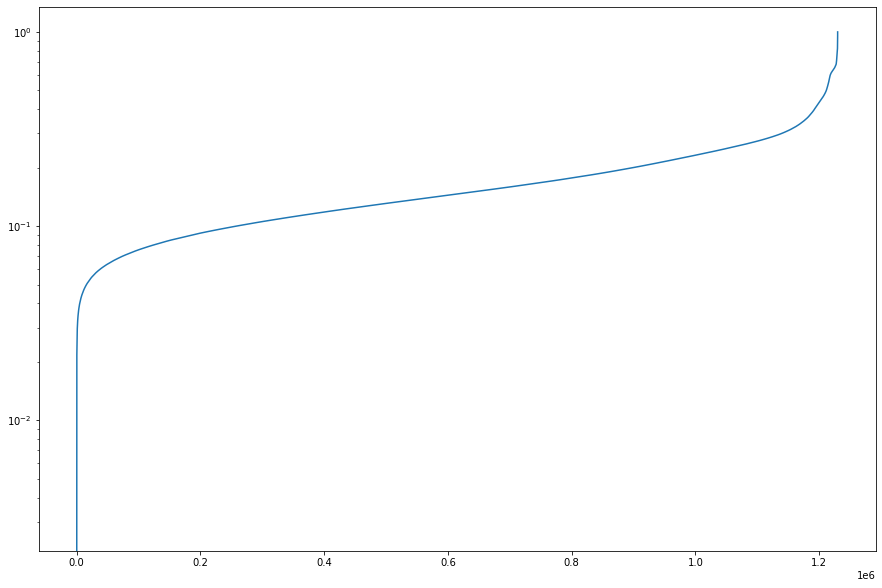

In [32]:
ind = np.arange(len(dist1d_sorted))

plt.figure(figsize=(15,10))
#plt.bar(ind, dist1d_sorted[:100])
#plt.hist(dist1d_sorted, bins=1000)
plt.plot(dist1d_sorted)
plt.yscale('log')
plt.show()

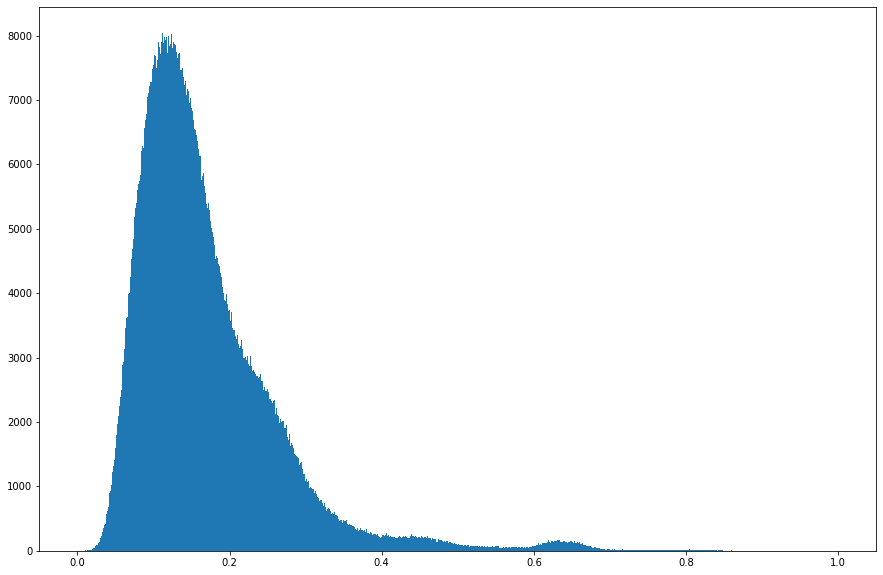

In [33]:
ind = np.arange(len(dist1d_sorted))

plt.figure(figsize=(15,10))
#plt.bar(ind, dist1d_sorted[:100])
plt.hist(dist1d_sorted, bins=1000)
#plt.plot(dist1d_sorted)
#plt.yscale('log')
plt.show()

In [34]:
import random
samples = random.sample(list(dist1d_sorted), 100)
#samples

In [35]:
samples_sorted = np.sort(samples)
#samples_sorted

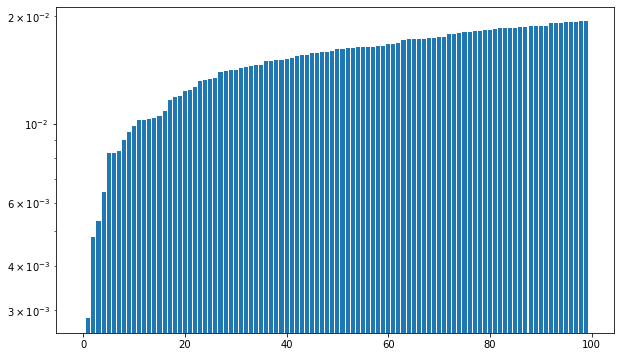

In [36]:
ind = np.arange(100)

plt.figure(figsize=(10,6))
plt.bar(ind, dist1d_sorted[:100])
#plt.hist(dist1d_sorted[:100], bins=10)
#plt.plot(samples_sorted)
plt.yscale('log')
plt.show()

In [37]:
#iterdist_sorted

In [38]:
def compute_difference(pairs):
    answer_length = []
    word_count = []
    avg_word_length = []

    feat_diff_all = []

    for pair in pairs:
        feat_diff = []

        idx1 = pair[0]
        idx2 = pair[1]

        feat1 = x_normed[idx1][:12]
        feat2 = x_normed[idx2][:12]

        for i in range(12):
            diff = abs(feat1[i] - feat2[i])
            feat_diff.append(diff)

        feat_diff_all.append(feat_diff)
    
    return feat_diff_all

## Nearest pairs

In [39]:
nearest_pairs_iter = iterdist_sorted[:10000]

nearest_pairs = [i[0] for i in nearest_pairs_iter]
#nearest_pairs

feat_diff_all = compute_difference(nearest_pairs)

a = np.array(feat_diff_all)
b = np.mean(a, axis=0)

nearest_diff = b
nearest_diff

array([0.08608674, 0.08623281, 0.10107495, 0.08680334, 0.11561572,
       0.12128198, 0.07414675, 0.05390039, 0.0944626 , 0.10910992,
       0.12707711, 0.05136662])

## Farthest pairs

In [40]:
farthest_pairs_iter = iterdist_sorted[-10000:]

farthest_pairs = [i[0] for i in farthest_pairs_iter]

feat_diff_all = compute_difference(farthest_pairs)

a = np.array(feat_diff_all)
b = np.mean(a, axis=0)

farthest_diff = b
farthest_diff

array([0.455854  , 0.46065378, 0.21456828, 0.46296492, 0.51795346,
       0.39104865, 0.21695858, 0.07580302, 0.41736693, 0.16886351,
       0.22050533, 0.06079761])

## Medium distance

In [41]:
medium_pairs_iter = iterdist_sorted[610000:620000]

medium_pairs = [i[0] for i in medium_pairs_iter]

feat_diff_all = compute_difference(medium_pairs)

a = np.array(feat_diff_all)
b = np.mean(a, axis=0)

medium_diff = b
medium_diff

array([0.13024952, 0.13291084, 0.14871055, 0.13353697, 0.15101635,
       0.14086306, 0.07628343, 0.07447207, 0.13324094, 0.17353839,
       0.16468438, 0.06688831])

In [42]:
nearest_diff < farthest_diff

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [43]:
nearest_diff < medium_diff

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [44]:
medium_diff < farthest_diff

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False])

In [45]:
feats

['Answer Length',
 'Word Counts',
 'Average Word Length',
 'Good n-gram',
 'Prompt Overlap',
 'Prompt Overlap (synonyms)',
 'Punctuation Counts',
 'Spelling Error',
 'Unique Words',
 'Prompt Similarity SBert',
 'Prompt Similarity BOW',
 'Language Error']

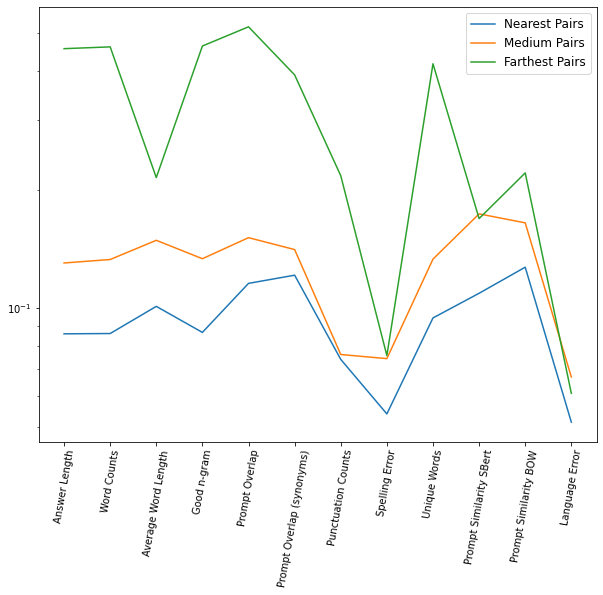

In [46]:
plt.figure(figsize=(10,8))
plt.plot(nearest_diff, label='Nearest Pairs')
plt.plot(medium_diff, label='Medium Pairs')
plt.plot(farthest_diff, label='Farthest Pairs')
plt.xticks(range(0,12), feats, rotation=80)
plt.legend(fontsize=12)
plt.yscale('log')
plt.show()

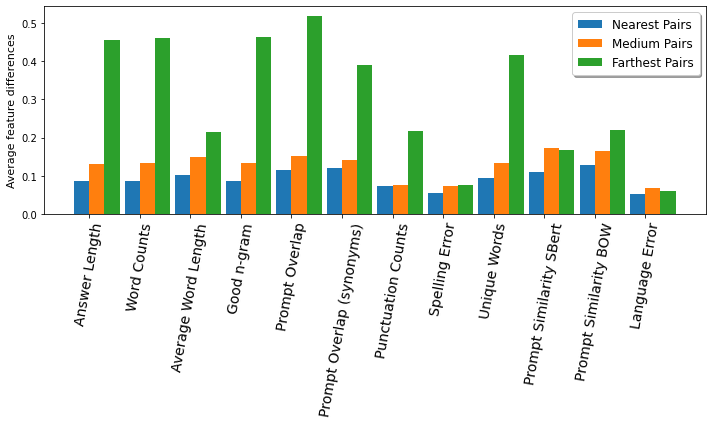

In [47]:
a = nearest_diff
b = medium_diff
c = farthest_diff

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center', label='Nearest Pairs')
plt.bar(ind + width, b, width, align='center', label='Medium Pairs')
plt.bar(ind + width + width, c, width, align='center', label='Farthest Pairs')

plt.ylabel("Average feature differences", fontsize=11)
plt.xticks(ind + width / 2, feats, fontsize=14, rotation=80)
plt.tight_layout()
plt.legend(fontsize=12, fancybox=True, shadow=True, borderpad=0.5)#, frameon=False)
plt.savefig('feat_difference_laser.png')
plt.show()

In [48]:
joblib.dump(nearest_diff, 'nearest_diff_laser')
joblib.dump(medium_diff, 'medium_diff_laser')
joblib.dump(farthest_diff, 'farthest_diff_laser')

['farthest_diff_laser']

In [137]:
def compute_score_difference(pairs):
    score_diff_gb = []
    score_diff_rf = []
    score_diff_rr = []
    
    for pair in pairs:

        idx1 = pair[0]
        idx2 = pair[1]

        diff = abs(score_gb[idx1] - score_gb[idx2])
        score_diff_gb.append(diff)
        
        diff = abs(score_rf[idx1] - score_rf[idx2])
        score_diff_rf.append(diff)
        
        diff = abs(score_rr[idx1] - score_rr[idx2])
        score_diff_rr.append(diff)
    
    return score_diff_gb, score_diff_rf, score_diff_rr

In [141]:
a, b, c = compute_score_difference(nearest_pairs)

a = np.array(a)
a = np.mean(a, axis=0)
b = np.array(b)
b = np.mean(b, axis=0)
c = np.array(c)
c = np.mean(c, axis=0)

score_diff_nearest = [a,b,c]

a, b, c = compute_score_difference(medium_pairs)

a = np.array(a)
a = np.mean(a, axis=0)
b = np.array(b)
b = np.mean(b, axis=0)
c = np.array(c)
c = np.mean(c, axis=0)

score_diff_medium = [a,b,c]

a, b, c = compute_score_difference(farthest_pairs)


a = np.array(a)
a = np.mean(a, axis=0)
b = np.array(b)
b = np.mean(b, axis=0)
c = np.array(c)
c = np.mean(c, axis=0)

score_diff_farthest = [a,b,c]

In [145]:
score_diff_nearest

[2.771181809902191, 1.959772, 5.4348236000000005]

In [146]:
score_diff_medium

[3.8270563665866852, 3.246147, 5.0251504]

In [147]:
score_diff_farthest

[5.917873597717285, 6.258018, 4.6881702]

In [148]:
joblib.dump(score_diff_nearest, 'score_diff_nearest_ngram')
joblib.dump(score_diff_medium, 'score_diff_medium_ngram')
joblib.dump(score_diff_farthest, 'score_diff_farthest_ngram')

['score_diff_farthest_ngram']